<a href="https://colab.research.google.com/github/calosos/py_resumenes_codigos/blob/main/Trading_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.    Installation of libraries

In [1]:
!pip install fxcmpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 52 kB 170 kB/s 
     |████████████████████████████████| 54 kB 803 kB/s 
     |████████████████████████████████| 52 kB 706 kB/s 


In [2]:
!pip install fxcmpy --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 70 kB 3.6 MB/s 


In [4]:
!pip install --upgrade mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install pyti

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 2. Librarys

In [6]:
import time
import numpy as np
import pandas as pd
import datetime as dt
from pylab import mpl,plt
import fxcmpy

In [7]:
import mplfinance as mpf

In [8]:
from fxcmpy import  fxcmpy_tick_data_reader as tdr

In [9]:
plt.style.use('seaborn')
mpl.rcParams['font.family']='serif'
%matplotlib inline

In [10]:
from scipy import stats

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
from scipy.stats import iqr

In [13]:
from scipy.stats import skew, kurtosis

In [68]:
from sklearn.linear_model import LinearRegression

#3. Broker connection

D161558089 usuario 
kM3tl password

In [14]:
TOKEN = '71c091611d0281db76d7d9595aa08f8ad6ee1dce'

In [15]:
con = fxcmpy.fxcmpy(access_token='8030bef1dcbafa80e75ef40522559c442fa07d41', log_level='error')

#4. Instruments DataFrame 

In [16]:
instruments = con.get_instruments()
print(instruments)

['EUR/USD', 'USD/JPY', 'GBP/USD', 'USD/CHF', 'EUR/CHF', 'AUD/USD', 'USD/CAD', 'NZD/USD', 'EUR/GBP', 'EUR/JPY', 'GBP/JPY', 'CHF/JPY', 'GBP/CHF', 'EUR/AUD', 'EUR/CAD', 'AUD/CAD', 'AUD/JPY', 'CAD/JPY', 'NZD/JPY', 'GBP/CAD', 'GBP/NZD', 'GBP/AUD', 'AUD/NZD', 'USD/SEK', 'EUR/SEK', 'EUR/NOK', 'USD/NOK', 'USD/MXN', 'AUD/CHF', 'EUR/NZD', 'USD/ZAR', 'USD/HKD', 'ZAR/JPY', 'USD/TRY', 'EUR/TRY', 'NZD/CHF', 'CAD/CHF', 'NZD/CAD', 'TRY/JPY', 'USD/CNH', 'AUS200', 'ESP35', 'FRA40', 'GER30', 'HKG33', 'JPN225', 'NAS100', 'SPX500', 'UK100', 'US30', 'Copper', 'CHN50', 'EUSTX50', 'VOLX', 'USDOLLAR', 'US2000', 'INDIA50', 'USOil', 'UKOil', 'SOYF', 'NGAS', 'USOilSpot', 'UKOilSpot', 'WHEATF', 'CORNF', 'Bund', '5USNote', '10USNote', '2USNote', 'Bobl', 'Schatz', 'FED30D', 'EURIBOR3M', 'EURDLR3M', 'SONIA3M', 'IBHY', 'XAU/USD', 'XAG/USD', 'EMBasket', 'JPYBasket', 'BTC/USD', 'BCH/USD', 'ETH/USD', 'LTC/USD', 'CryptoMajor', 'EOS/USD', 'XLM/USD', 'ADA/USD', 'DOGE/USD', 'DOT/USD', 'BTC/EUR', 'BTC/AUD', 'BTC/GBP', 'ETH/EU

In [17]:
df_instruments = pd.DataFrame(instruments, columns=['Instruments'])
df_instruments.size
df_instruments.head()

,Instruments
0,EUR/USD
1,USD/JPY
2,GBP/USD
3,USD/CHF
4,EUR/CHF


In [18]:
df_instruments_na=df_instruments.replace('', np.nan)
df_instruments_na.head()

,Instruments
0,EUR/USD
1,USD/JPY
2,GBP/USD
3,USD/CHF
4,EUR/CHF


In [19]:
df_instruments_dropna=df_instruments_na.dropna()
df_instruments_dropna.head()

,Instruments
0,EUR/USD
1,USD/JPY
2,GBP/USD
3,USD/CHF
4,EUR/CHF


In [20]:
df_instruments_clean=df_instruments_dropna.reset_index(inplace=False, drop=True)
df_instruments_clean

,Instruments
0,EUR/USD
1,USD/JPY
2,GBP/USD
3,USD/CHF
4,EUR/CHF
...,...
314,SNAP.us
315,SNOW.us
316,SPCE.us
317,XPEV.us


In [21]:
df_instruments_clean

,Instruments
0,EUR/USD
1,USD/JPY
2,GBP/USD
3,USD/CHF
4,EUR/CHF
...,...
314,SNAP.us
315,SNOW.us
316,SPCE.us
317,XPEV.us


#5.Lista de Instrumentos 

In [27]:
df_instrumenf_for_candle = pd.DataFrame(con.get_instruments_for_candles(), columns=['Instruments'])
df_instrumenf_for_candle

,Instruments
0,AUD/CAD
1,AUD/CHF
2,AUD/JPY
3,AUD/NZD
4,AUD/USD
...,...
64,FB.us
65,
66,NFLX.us
67,TSLA.us


#6.Parametros para obtener datos



Elegir Instrumento

In [28]:
#EUR/USD=22
#Oro  =59
#BTC/USD=61 ;
#Amazon=63; fb = 64; nfxl= 66
num_instrument=64
instrument = df_instrumenf_for_candle.at[num_instrument, 'Instruments']
instrument

'FB.us'

Elegir  Temporalidad

In [29]:
# # Available periods : 'm1', 'm5', 'm15', 'm30', 'H1', 'H2', 'H3', 'H4', 'H6', 'H8','D1', 'W1', or 'M1'.
timeframe = "D1" 

Elegir número de peridos

In [30]:
numberofcandles = 100

In [31]:
data_candles = con.get_candles(instrument,period=timeframe, number=numberofcandles)
data_candles.tail()

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty
date,,,,,,,,,
2022-05-23 21:00:00,193.52,196.06,196.86,191.11,193.75,196.28,197.11,191.44,71821
2022-05-24 21:00:00,196.06,180.92,183.48,175.99,196.28,181.15,183.83,176.31,60192
2022-05-25 21:00:00,180.92,183.64,185.28,179.14,181.15,183.87,185.58,179.48,46276
2022-05-26 21:00:00,183.64,191.42,192.71,182.10,183.87,191.65,192.99,182.49,50100
2022-05-31 21:00:00,194.83,193.45,197.48,191.90,195.14,193.68,197.72,192.18,78189


##6.1Limpieza de Tabla 

In [32]:
candles_2 = data_candles[data_candles.columns[:4]] 
candles_bid=candles_2.rename(columns={"bidopen": "Open", "bidclose": "Close",'bidhigh':'High','bidlow':'Low'})
candles_bid.tail()
candles_bid.shape

(100, 4)

In [33]:
candles_2 = data_candles[data_candles.columns[4:8]] 
candles_ask=candles_2.rename(columns={"askopen": "Open", "askclose": "Close",'askhigh':'High','asklow':'Low'})
candles_ask.tail()
candles_ask.shape

(100, 4)

#Start

<Mpf_Figure size 2000x1400 with 0 Axes>

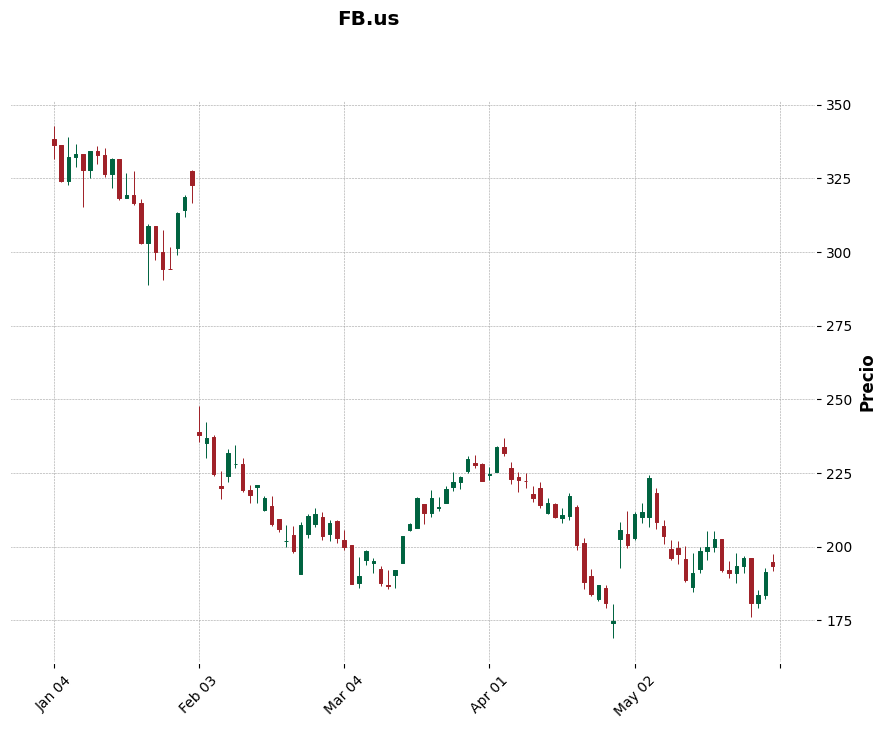

In [34]:
mpf.figure(figsize=(20, 14))
mpf.plot(candles_bid, type='candle', style='charles', title= instrument, ylabel= 'Precio', figscale=1.4);

In [35]:
candles_bid['Mid']=candles_bid[['Open','Close']].mean(axis=1)
candles_bid.head(3)

,Open,Close,High,Low,Mid
date,,,,,
2022-01-04 22:00:00,338.28,336.43,342.93,331.72,337.355
2022-01-05 22:00:00,336.43,324.00,335.59,323.67,330.215
2022-01-06 22:00:00,324.00,332.38,338.99,322.79,328.190


Calcular el precio promedio de cada periodo

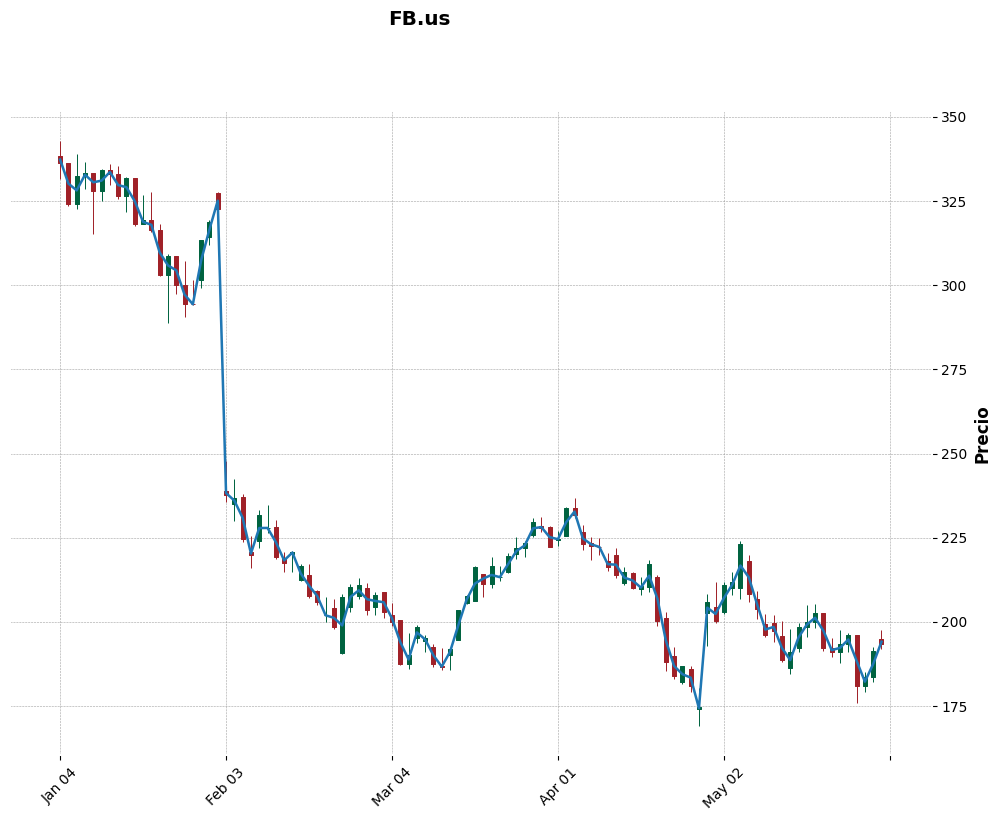

In [36]:
apdict = mpf.make_addplot(candles_bid['Mid'])
mpf.plot(candles_bid, type='candle', style='charles', title= instrument, ylabel= 'Precio', addplot=apdict,figscale=1.6);

#mpf.plot(candles_bid,volume=True,addplot=apdict)

último precio promedio 

In [37]:
candles_bid.tail(1)

,Open,Close,High,Low,Mid
date,,,,,
2022-05-31 21:00:00,194.83,193.45,197.48,191.9,194.14


##Conectar para adquir datos

In [38]:
def output(data, dataframe):
  print('%3d | %s | %s | %6.5f, %6.5f'
    % (len(dataframe), data['Symbol'],
      pd.to_datetime(int(data['Updated']), unit='ms'),
      data['Rates'][0], data['Rates'][1]))

In [39]:
con.subscribe_market_data(instrument, (output,))

Usar solo cúando se vaya a desconectar de los  datos

In [40]:
#con.unsubscribe_market_data(instrument)

In [41]:
con.get_subscribed_symbols()

['FB.us']

In [42]:
con.get_last_price(instrument)

Bid     200.24
Ask     200.48
High    187.53
Low     201.11
Name: 2022-06-02 19:02:25.087000, dtype: float64

#7.Estimados de locación

##Promedio 

In [43]:
promedio =candles_bid['Mid'].mean()
print(f'El promedio es: {promedio}')

El promedio es: 229.97254999999998


##Mediana

In [44]:
mediana =candles_bid['Mid'].median()
print(f'La mediana es: {mediana}')

La mediana es: 213.0375


##Media Truncada

In [45]:
media_truncada = stats.trim_mean(candles_bid['Mid'], 0.1)   
print(f'La media truncada: {media_truncada}')

La media truncada: 222.96756249999999


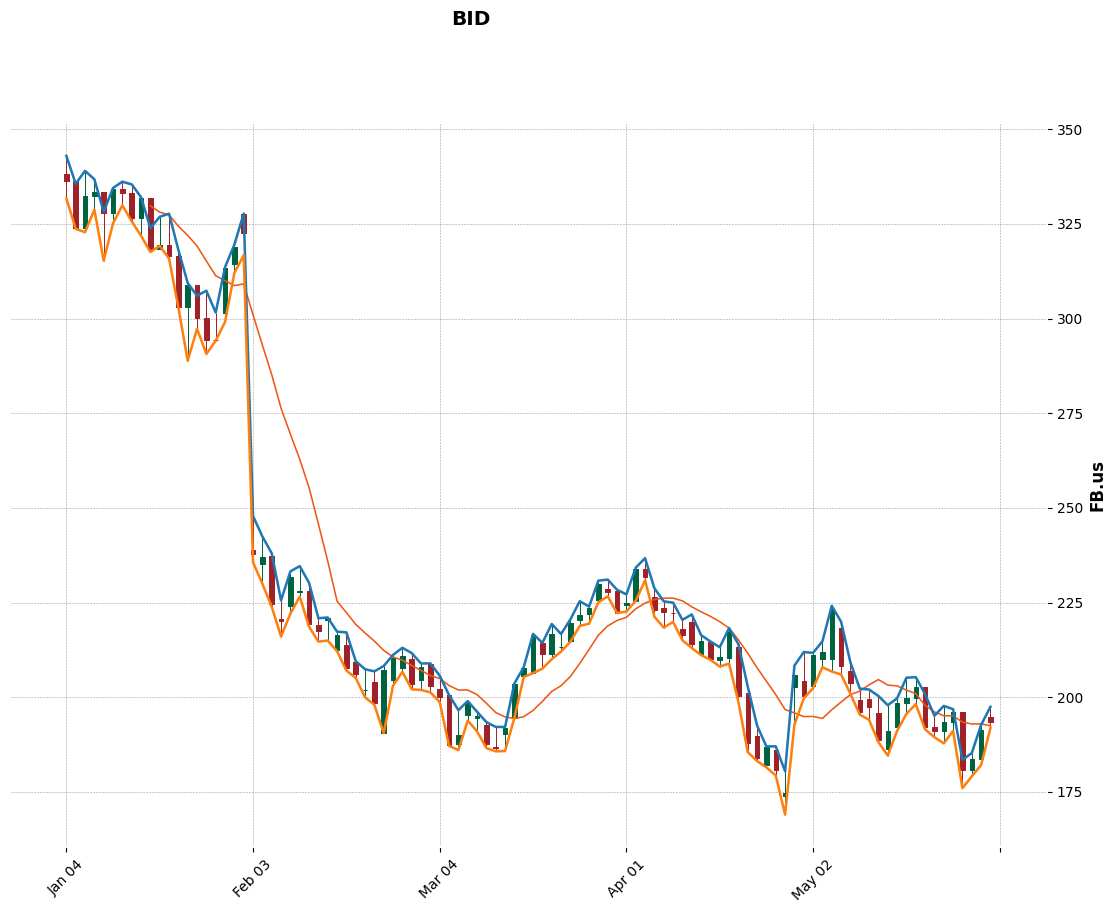

In [46]:
tcdf = candles_bid[['High','Low']]  # DataFrame with two columns
apd  = mpf.make_addplot(tcdf)
mpf.plot(candles_bid, type='candle', style='charles', title= 'BID', ylabel= instrument, addplot=apd, mav=10, figscale=1.8) ;

## Valores Atípicos

##Desviación Estándar

In [47]:
std_candles =candles_bid['Mid'].std()
print(f'Desviación estandar: {std_candles}')

Desviación estandar: 47.52300819419746


##Rango

In [48]:
rango = candles_bid['Mid'].max() - candles_bid['Mid'].min()
rango

162.96500000000003

## Percentiles

In [49]:
percentil = candles_bid['Mid'].quantile(0.8)

In [50]:
f'En este caso, el 80% de los valores en nuestro conjunto de datos tienen un valor menor o igual a {percentil}.'

'En este caso, el 80% de los valores en nuestro conjunto de datos tienen un valor menor o igual a 249.51300000000018.'

  5 | FB.us | 2022-06-02 19:02:29.242000 | 200.14000, 200.40000


En este caso, el 80% de los valores en nuestro conjunto de datos tienen un valor menor o igual a 1 440 000.

In [51]:
print(f'Valor mínimo: {candles_bid["Mid"].min()}')
print(f'Percentil 10: {candles_bid["Mid"].quantile(0.1)}')
print(f'Percentil 25: {candles_bid["Mid"].quantile(0.25)}')
print(f'Percentil 50: {candles_bid["Mid"].median()}')
print(f'Percentil 75: {candles_bid["Mid"].quantile(0.75)}')
print(f'Percentil 90: {candles_bid["Mid"].quantile(0.9)}')
print(f'Valor máximo: {candles_bid["Mid"].max()}')

Valor mínimo: 174.39
Percentil 10: 189.958
Percentil 25: 198.8725
Percentil 50: 213.0375
Percentil 75: 228.555
Percentil 90: 324.994
Valor máximo: 337.355


## Rango intercuartílico

In [52]:
candles_bid["Mid"].quantile(0.75) - candles_bid["Mid"].quantile(0.25)

29.682500000000005

#8.Distribuciones

Text(0.5, 0, 'Precio promedio')

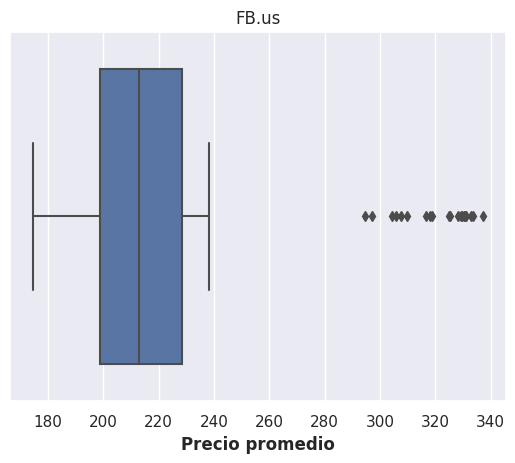

In [53]:
sns.set(style="darkgrid");
ax=sns.boxplot(x=candles_bid["Mid"]);
ax.set_title(f'{instrument}')
ax.set_xlabel('Precio promedio')

Text(0.5, 28.0, 'Precio promedio')

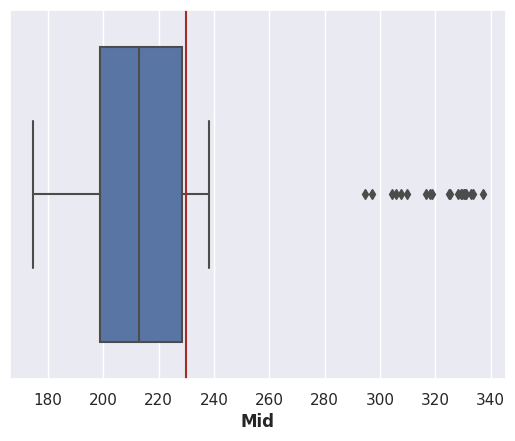

In [54]:
sns.set(style="darkgrid")
sns.boxplot(x=candles_bid["Mid"])
plt.axvline(candles_bid["Mid"].mean(), c='brown')
ax.set_title(f'{instrument}')
ax.set_xlabel('Precio promedio')

In [55]:
iqr_uno = iqr(candles_bid["Mid"])
iqr_uno

29.682500000000005

In [56]:
iqr = candles_bid["Mid"].quantile(0.75) - candles_bid["Mid"].quantile(0.25)
filtro_inferior = candles_bid["Mid"]> candles_bid["Mid"].quantile(0.25) - (iqr * 1.5)
filtro_superior = candles_bid["Mid"] < candles_bid["Mid"].quantile(0.75) + (iqr * 1.5)

df_filtrado = candles_bid[filtro_inferior & filtro_superior]
df_filtrado.shape

(80, 5)

  6 | FB.us | 2022-06-02 19:02:31.238000 | 200.12000, 200.40000


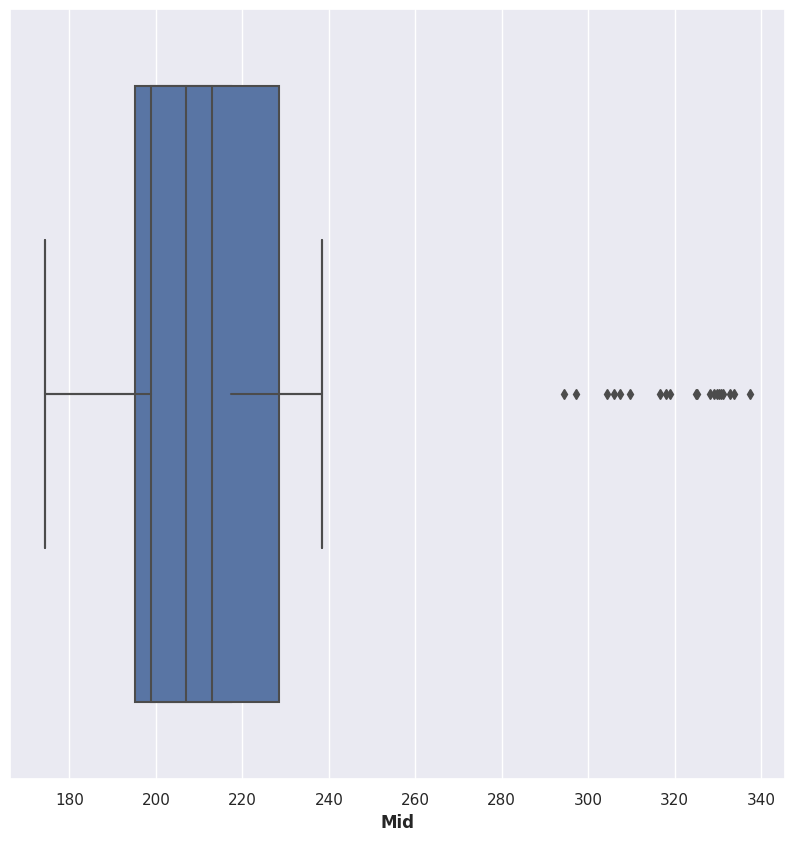

In [57]:
fig = plt.figure(figsize=(10, 10))
sns.set(style="darkgrid")
sns.boxplot(x=df_filtrado['Mid'])
sns.boxplot(x=candles_bid["Mid"])


## Tabla de frecuencias

In [58]:
mid = candles_bid["Mid"]

In [59]:
segmentos = pd.cut(mid, 20)
candles_bid["Mid"].groupby(segmentos).count()

Mid
(174.227, 182.538]     2
(182.538, 190.686]     9
(190.686, 198.835]    14
(198.835, 206.983]    15
(206.983, 215.131]    16
(215.131, 223.279]    11
(223.279, 231.428]    10
(231.428, 239.576]     3
(239.576, 247.724]     0
(247.724, 255.872]     0
(255.872, 264.021]     0
(264.021, 272.169]     0
(272.169, 280.317]     0
(280.317, 288.466]     0
(288.466, 296.614]     1
(296.614, 304.762]     2
(304.762, 312.91]      3
(312.91, 321.058]      3
(321.058, 329.207]     4
(329.207, 337.355]     7
Name: Mid, dtype: int64

##Histogramas

https://www.tradingsys.org/histograma-de-operaciones-y-curva-normal

Text(0.5, 0, 'Precio promedio')

 11 | FB.us | 2022-06-02 19:02:38.229000 | 200.19000, 200.48000


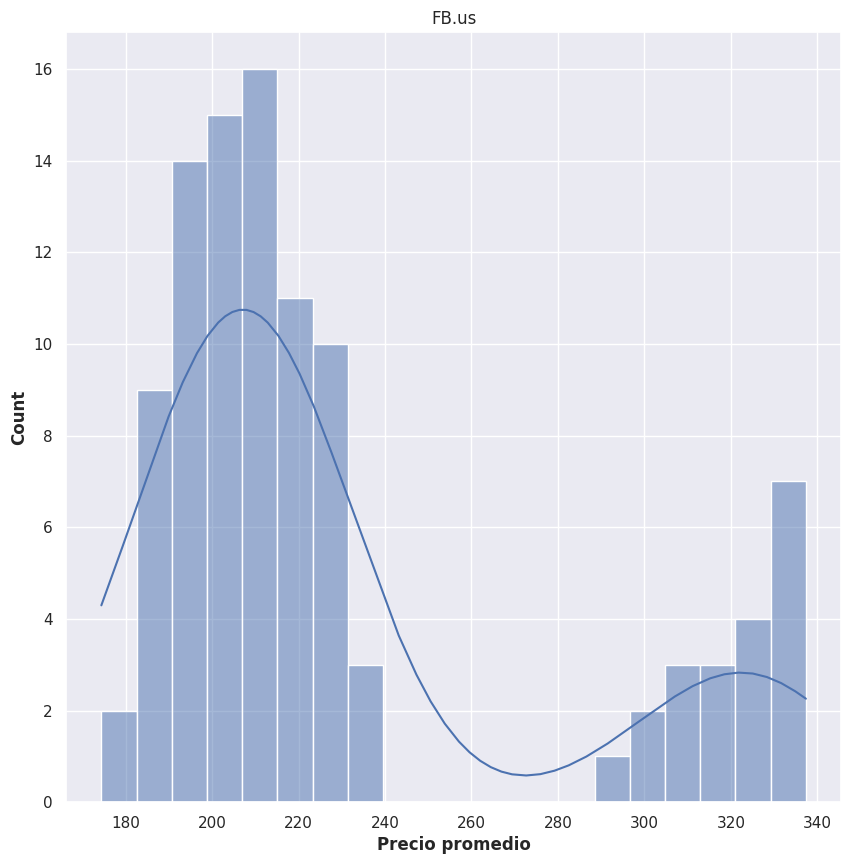

In [60]:
fig = plt.figure(figsize=(10, 10))
ax =sns.histplot(candles_bid["Mid"], kde=True,  bins=20);
ax.set_title(f'{instrument}')
ax.set_xlabel('Precio promedio')

In [61]:
print(f'Curtosis: {kurtosis(candles_bid["Mid"])}')
print(f'Asimetría: {skew(candles_bid["Mid"])}')

Curtosis: 0.1116468007048792
Asimetría: 1.2802245610324001



- Números negativos indican que hay una asimetría negativa, es decir que la cola de la izquierda es más larga que la cola de la derecha.

- Curtosis negativa indica que nuestra distribución está escarpada. Esto implica que hay menos dispersión de nuestros datos, que están más cercanos a nuestro punto central y que por lo tanto tenemos colas cortas (comparadas con la cola normal).

##Gráficas de densidad

In [ ]:
fb = candles_bid["Mid"]

In [ ]:
fb.tail()

date
2022-05-23 21:00:00    194.79
2022-05-24 21:00:00    188.49
2022-05-25 21:00:00    182.28
2022-05-26 21:00:00    187.53
2022-05-31 21:00:00    194.14
Name: Mid, dtype: float64

In [ ]:
netflix = candles_bid["Mid"]

In [ ]:
netflix.tail()

date
2022-05-23 21:00:00    186.750
2022-05-24 21:00:00    183.720
2022-05-25 21:00:00    183.900
2022-05-26 21:00:00    189.415
2022-05-31 21:00:00    196.575
Name: Mid, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Precio promedio')

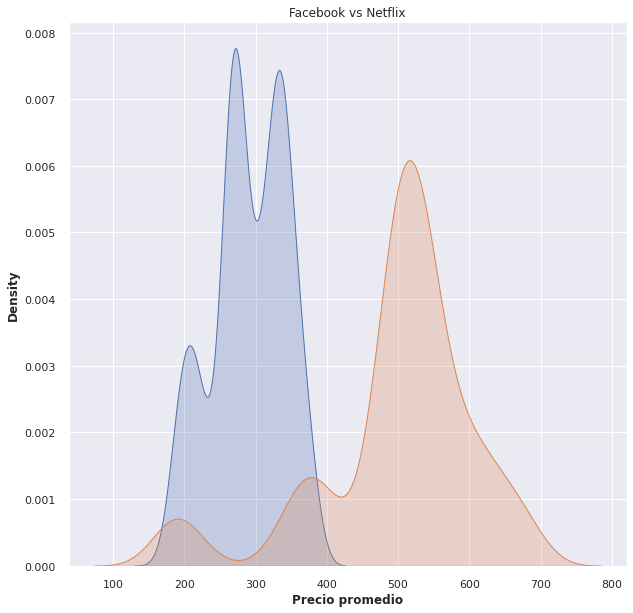

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax =sns.distplot(fb, hist = False, kde_kws = {'shade': True}) #azul
sns.distplot(netflix, hist = False, kde_kws = {'shade': True})
ax.set_title(f'Facebook vs Netflix')
ax.set_xlabel('Precio promedio')

#9.Exploración de Variables Categóricas y Análisis Multivariable

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


10000 | XAU/USD | 2022-06-02 08:14:54.158000 | 1851.75000, 1852.05000


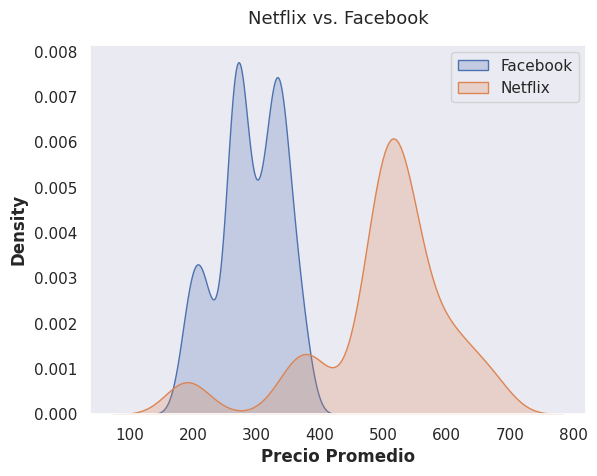

In [ ]:
ax=sns.distplot(fb, hist = False, kde_kws = {'shade': True}, label= 'Facebook') #azul
sns.distplot(netflix, hist = False, kde_kws = {'shade': True},label='Netflix', ax=ax)
ax.set_title('Netflix vs. Facebook', fontsize=13, pad=15)
ax.set(xlabel='Precio Promedio');
ax.legend(loc='upper right');

Se regresa a usar el último instrumento vigente

4632 | BTC/USD | 2022-06-02 08:19:10.838000 | 29958.30000, 29998.30000
10000 | EUR/USD | 2022-06-02 08:19:10.990000 | 1.06893, 1.06905
10000 | XAU/USD | 2022-06-02 08:19:10.921000 | 1852.08000, 1852.41000


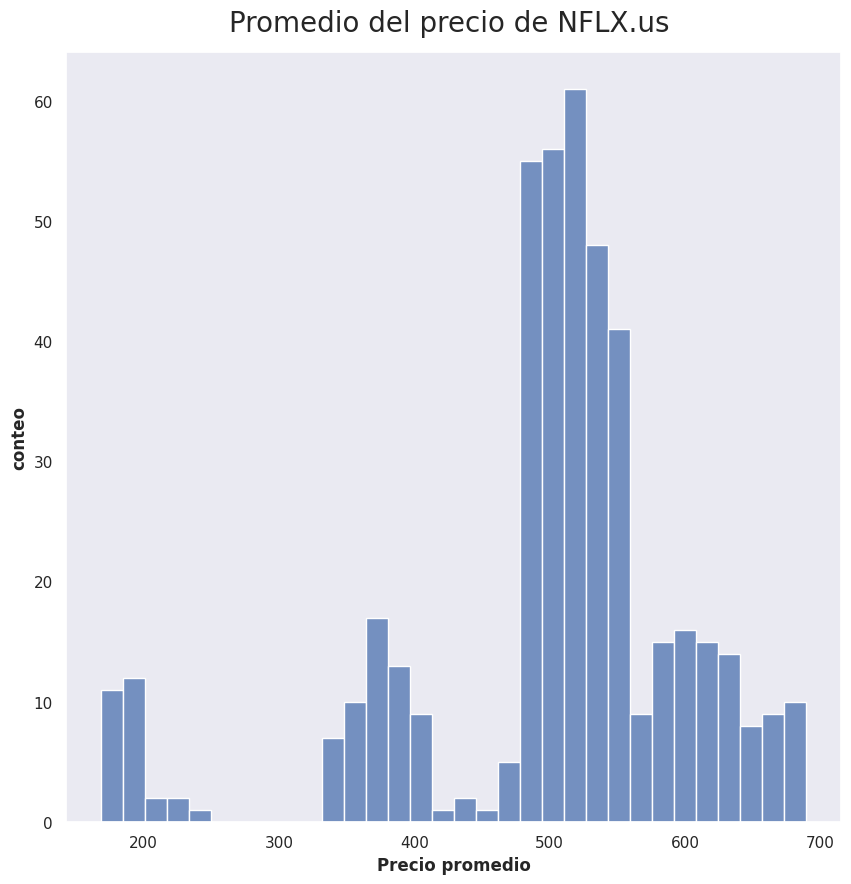

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = sns.histplot(candles_bid["Mid"], kde=False)
ax.set_title(f'Promedio del precio de {instrument} ', fontsize=20, pad=15)
ax.set(xlabel='Precio promedio', ylabel='conteo');

In [ ]:
candles_bid["Mid"].mode()

10000 | EUR/USD | 2022-06-02 08:22:01.257000 | 1.06915, 1.06928
10000 | XAU/USD | 2022-06-02 08:22:01.068000 | 1852.37000, 1852.70000


0      168.845
1      170.800
2      174.990
3      177.145
4      180.215
        ...   
445    682.765
446    683.155
447    685.385
448    686.425
449    689.360
Length: 450, dtype: float64

10000 | EUR/USD | 2022-06-02 08:39:40.943000 | 1.06909, 1.06922
5174 | BTC/USD | 2022-06-02 08:39:41.216000 | 29918.25000, 29958.25000


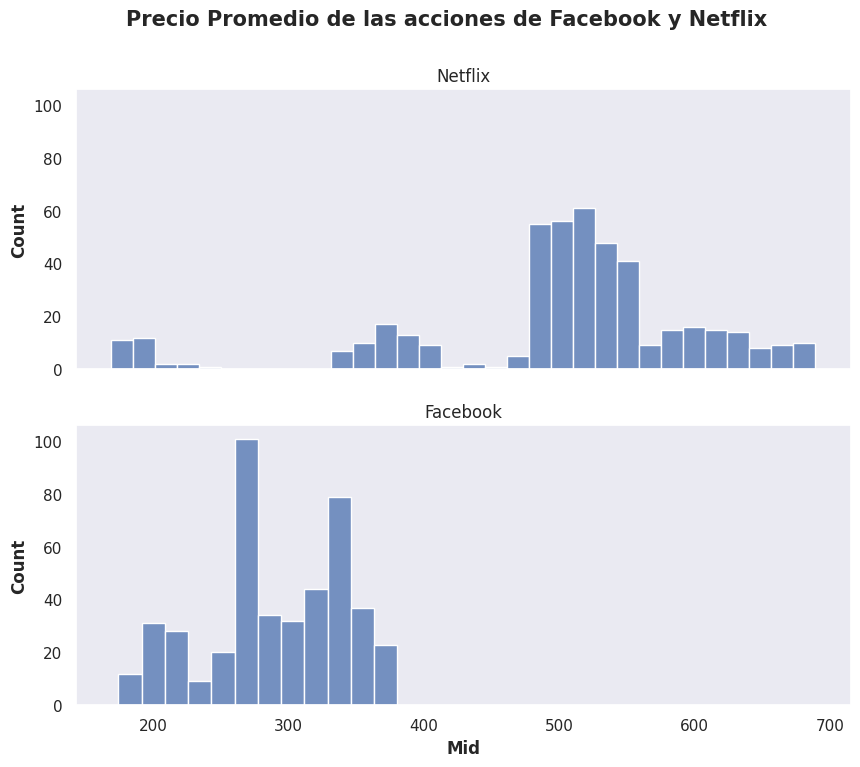

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True, sharey=True)
axes[0].set(xlabel='', ylabel='', title='Netflix')
axes[1].set(xlabel='', ylabel='', title='Facebook')

sns.histplot(netflix, ax=axes[0])
sns.histplot(fb, ax=axes[1])


fig.suptitle('Precio Promedio de las acciones de Facebook y Netflix ', fontsize=15);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Precio Promedio')

10000 | EUR/USD | 2022-06-02 08:43:15.518000 | 1.06912, 1.06925
10000 | XAU/USD | 2022-06-02 08:43:15.269000 | 1851.05000, 1851.44000
5239 | BTC/USD | 2022-06-02 08:43:15.613000 | 29910.00000, 29950.00000


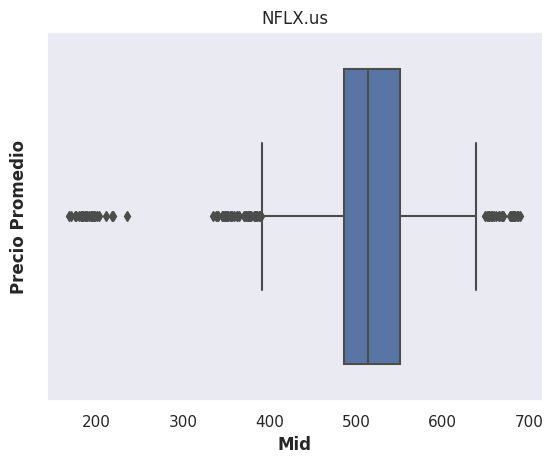

In [ ]:
ax = sns.boxplot(candles_bid["Mid"])
ax.set_title(f'{instrument}')
ax.set_ylabel('Precio Promedio')

10000 | XAU/USD | 2022-06-02 08:52:11.882000 | 1850.53000, 1850.91000


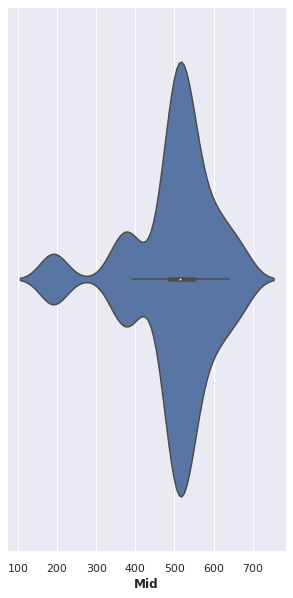

In [ ]:
plt.figure(figsize=(5, 10))
sns.violinplot(data=candles_bid, x='Mid');

#10.Correlaciones y Regresión Linear Simple

111 | FB.us | 2022-06-02 17:51:41.143000 | 198.20000, 198.52000
243 | NFLX.us | 2022-06-02 17:51:41.160000 | 203.34000, 203.80000


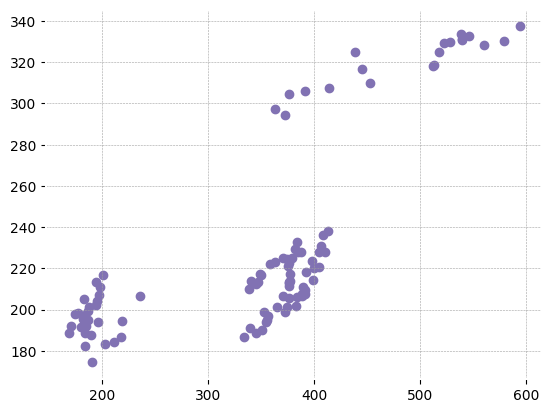

In [ ]:
plt.scatter(netflix, fb, c='m');

In [ ]:
print(f'Correlación entre las segundas dos Series: {netflix.corr(fb)}')

401 | FB.us | 2022-06-02 17:58:12.181000 | 198.75000, 199.05000
Correlación entre las segundas dos Series: 0.7640016272941954


Un valor de -1 significa que hay una correlación negativa perfecta. Esto quiere decir que el aumento de una variable resulta en la disminución de la otra; 
Un valor de 1 significa que hay una correlación positiva perfecta. Esto quiere decir que el aumento de una variable resulta en el aumento de la otra;
En cambio, un valor de 0 implica que no existe ninguna correlación entre las variables. Son completamente independientes la una de la otra. 

In [ ]:
candles_bid[['Open','Close']].tail(20)

,Open,Close
date,,
2022-05-02 21:00:00,203.08,211.07
2022-05-03 21:00:00,210.22,211.88
2022-05-04 21:00:00,210.24,223.28
2022-05-05 21:00:00,218.23,208.36
2022-05-06 21:00:00,206.93,203.73
2022-05-09 21:00:00,199.34,196.19
2022-05-10 21:00:00,199.63,197.44
2022-05-11 21:00:00,195.95,188.63
2022-05-12 21:00:00,186.31,191.09


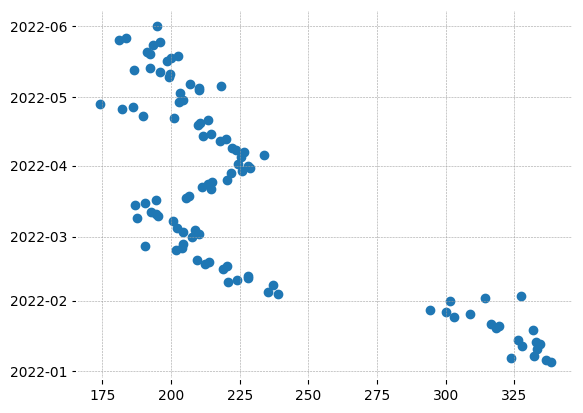

In [ ]:
plt.scatter(candles_bid["Open"],candles_bid.index)

650 | NFLX.us | 2022-06-02 18:02:25.179000 | 203.23000, 203.64000604 | FB.us | 2022-06-02 18:02:25.160000 | 199.42000, 199.71000



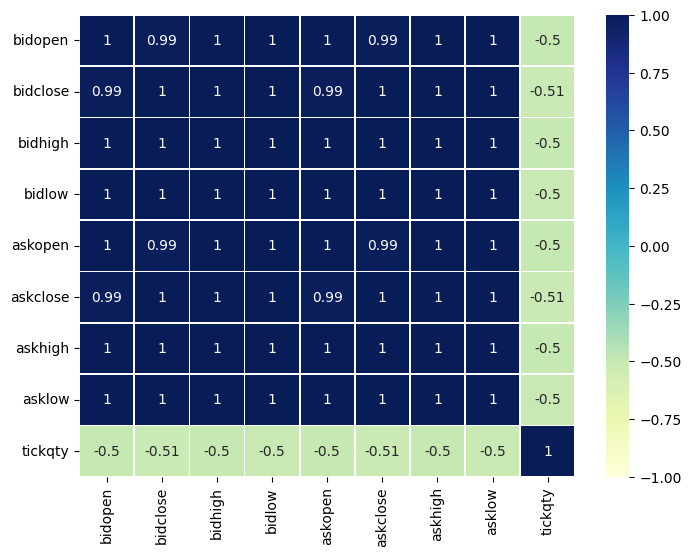

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(data_candles.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5);

785 | NFLX.us | 2022-06-02 18:05:58.163000 | 203.57000, 204.00000
770 | FB.us | 2022-06-02 18:05:58.187000 | 199.06000, 199.33000
786 | NFLX.us | 2022-06-02 18:05:59.188000 | 203.57000, 203.99000
771 | FB.us | 2022-06-02 18:05:59.212000 | 199.00000, 199.29000
787 | NFLX.us | 2022-06-02 18:06:00.156000 | 203.57000, 203.99000
772 | FB.us | 2022-06-02 18:06:00.159000 | 199.07000, 199.37000
788 | NFLX.us | 2022-06-02 18:06:01.189000 | 203.57000, 203.99000
773 | FB.us | 2022-06-02 18:06:01.191000 | 199.07000, 199.38000
789 | NFLX.us | 2022-06-02 18:06:02.193000 | 203.57000, 204.03000
774 | FB.us | 2022-06-02 18:06:02.211000 | 199.08000, 199.36000
790 | NFLX.us | 2022-06-02 18:06:03.158000 | 203.57000, 203.98000
775 | FB.us | 2022-06-02 18:06:05.290000 | 199.08000, 199.35000
791 | NFLX.us | 2022-06-02 18:06:05.243000 | 203.45000, 203.97000
792 | NFLX.us | 2022-06-02 18:06:06.154000 | 203.55000, 203.97000
776 | FB.us | 2022-06-02 18:06:06.138000 | 199.07000, 199.36000
777 | FB.us | 2022-06-02

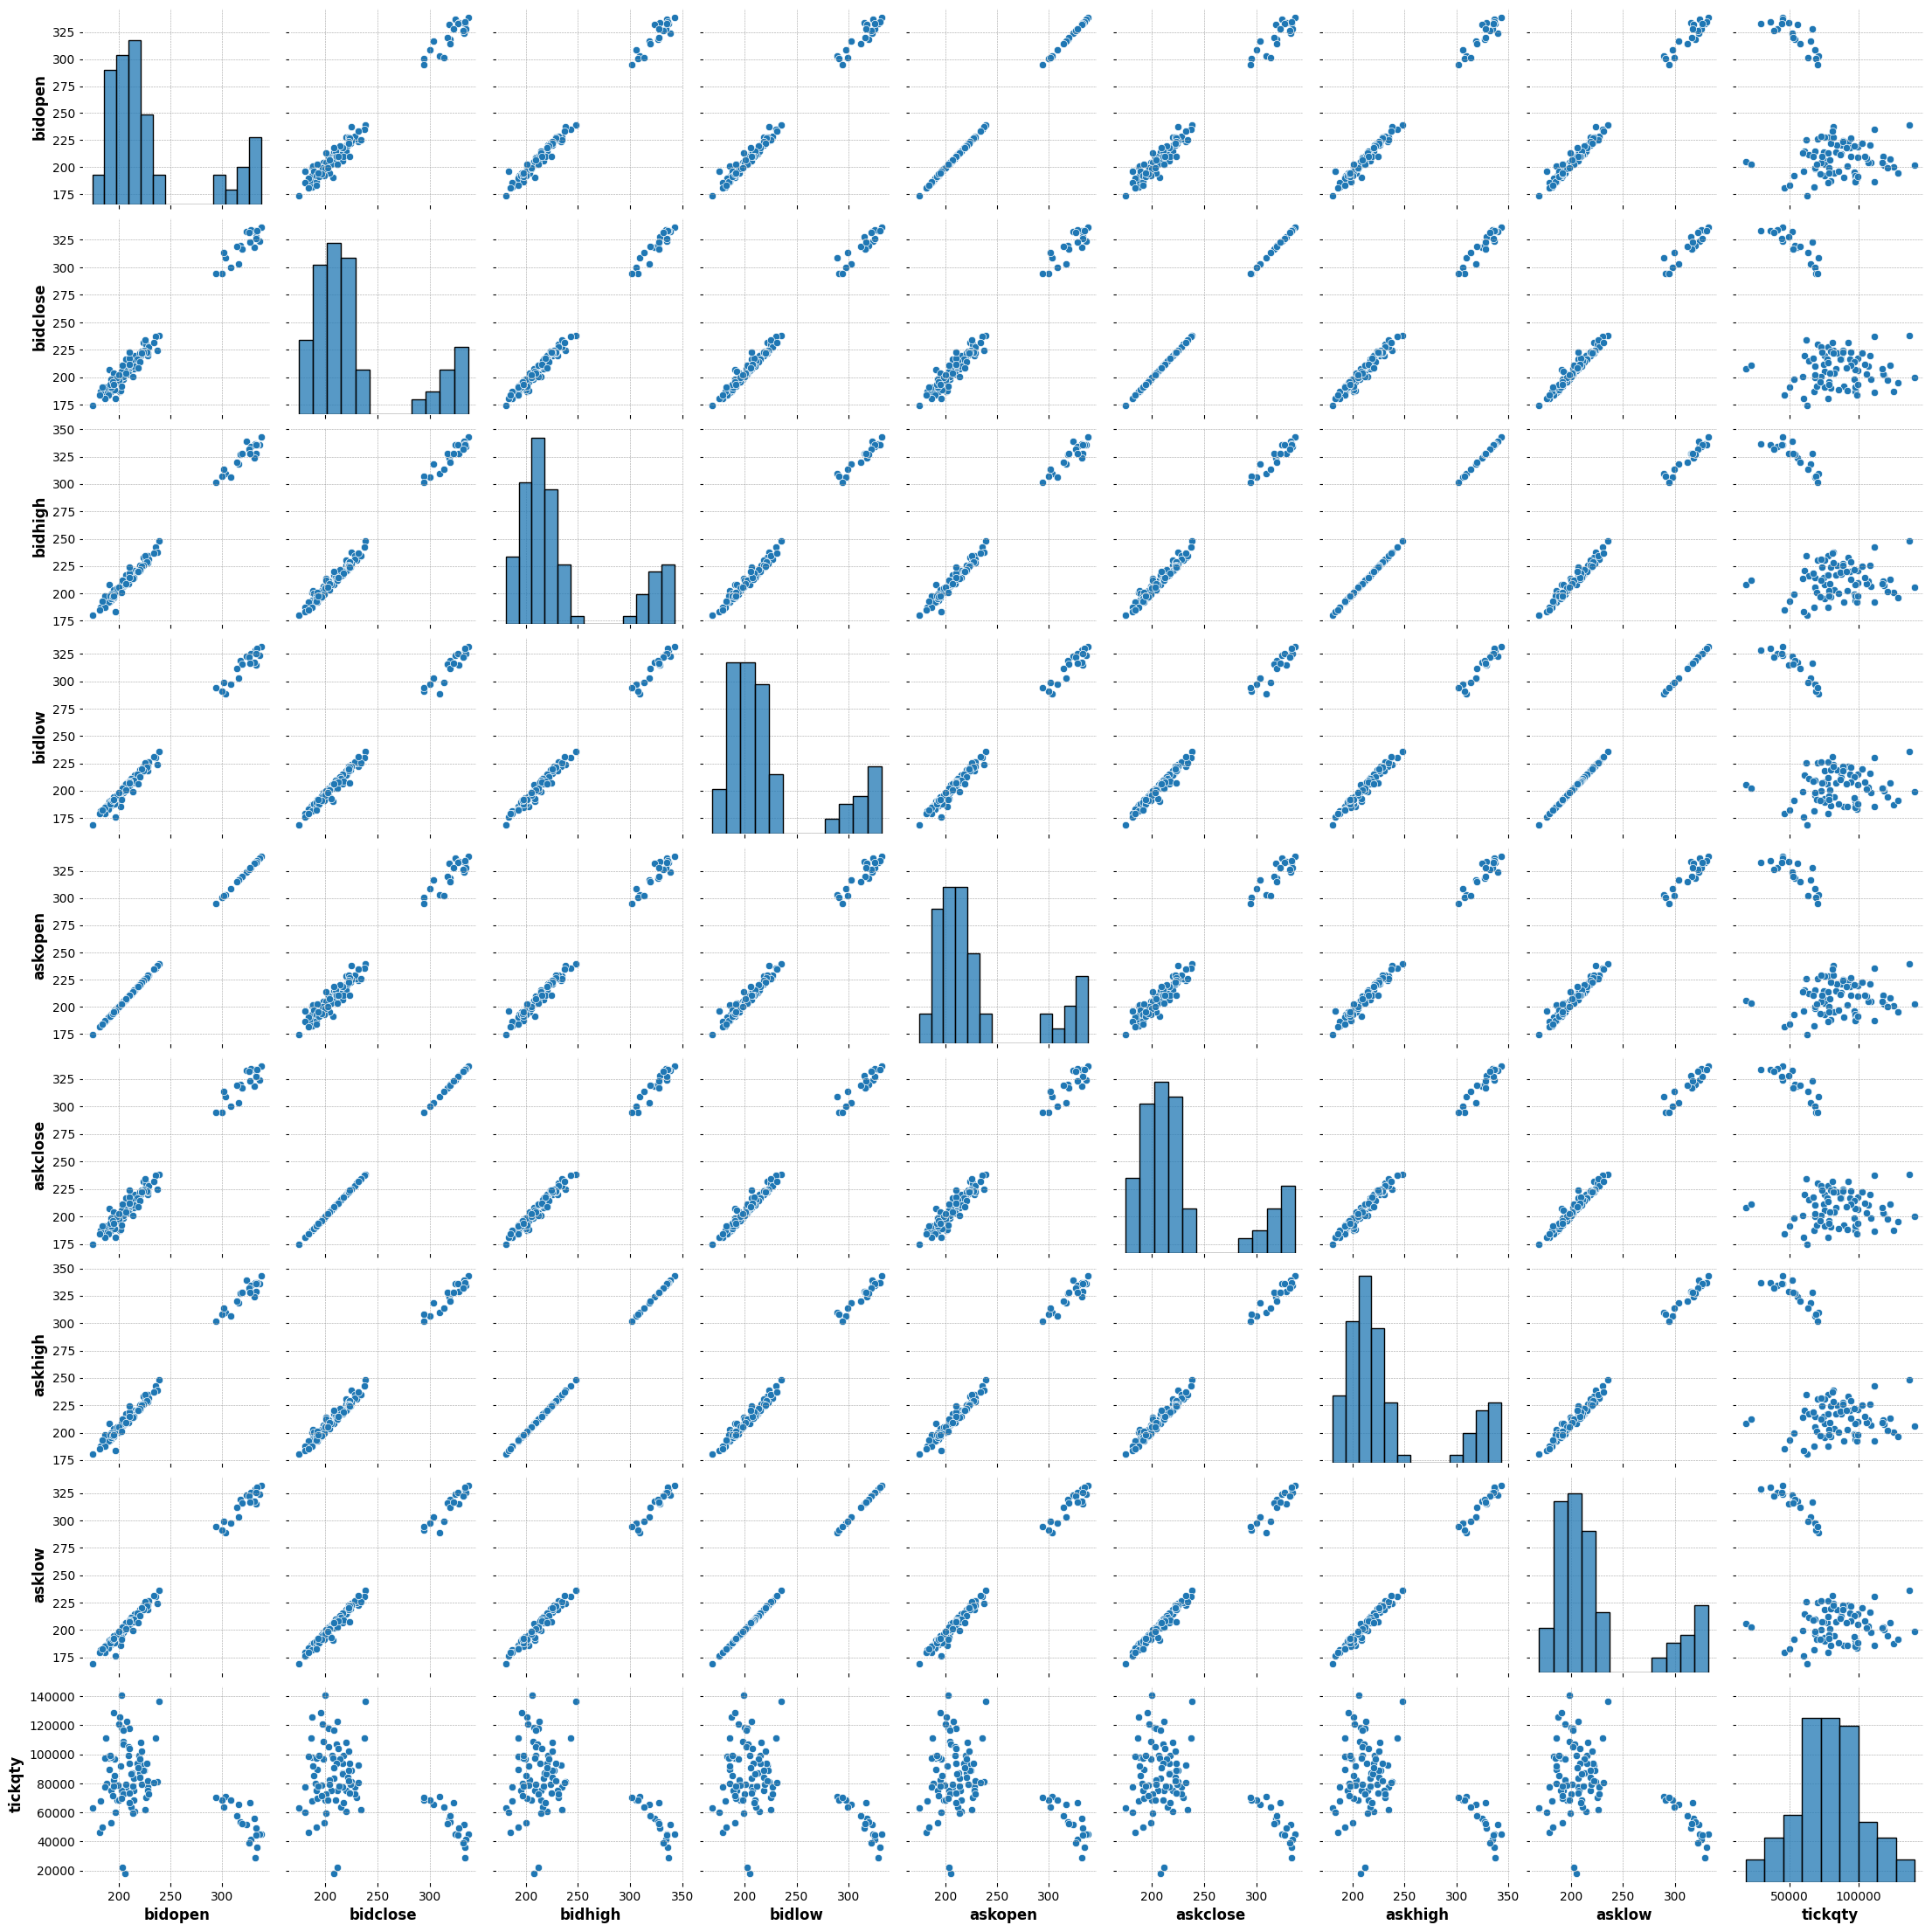

In [ ]:
sns.pairplot(data_candles);

Correlación   

In [66]:
candles_bid["Open"].corr(candles_bid["Close"])

0.9912970393945518

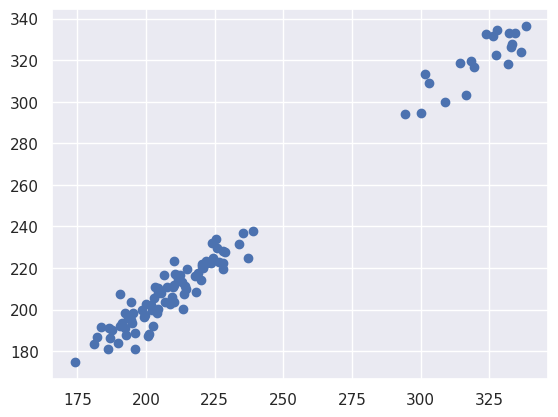

In [67]:
plt.scatter(candles_bid["Open"],candles_bid["Close"])

In [69]:
lr= LinearRegression()

In [74]:
serie_1 = candles_bid["Open"]
serie_2 = candles_bid['Close']

In [76]:
lr.fit(serie_1.to_frame(),serie_2)

1073 | FB.us | 2022-06-02 19:26:45.253000 | 199.27000, 199.53000


LinearRegression()

In [77]:
y_predict = lr.predict(serie_1.to_frame())

In [81]:
y_predict

array([335.79540754, 333.97844989, 321.77045871, 330.00078583,
       330.90435396, 325.60080188, 331.86685045, 330.62935496,
       324.24544968, 329.3623953 , 316.1035151 , 317.28208223,
       314.40441416, 301.16517675, 306.86158453, 298.26786589,
       292.7089576 , 299.69196783, 312.33210029, 325.24723174,
       238.12165676, 234.51720562, 236.50112695, 220.28600754,
       223.54670993, 227.38687449, 227.59312374, 218.7145847 ,
       219.92261601, 212.13425157, 213.65656744, 209.10926261,
       201.91018173, 203.95303142, 190.81200793, 204.36552991,
       207.6262323 , 209.83604567, 204.36552991, 208.66729993,
       202.09678819, 200.55482953, 187.75755479, 195.43788391,
       194.57360135, 192.68789395, 187.16827123, 190.47808058,
       194.66199389, 205.39677615, 206.25123732, 214.08870872,
       211.13246951, 213.00835552, 214.49138583, 219.9324374 ,
       221.48421746, 225.31456062, 228.04490781, 227.57348095,
       223.92974425, 225.01009745, 233.17167482, 226.11

1209 | FB.us | 2022-06-02 19:29:56.182000 | 199.12000, 199.40000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


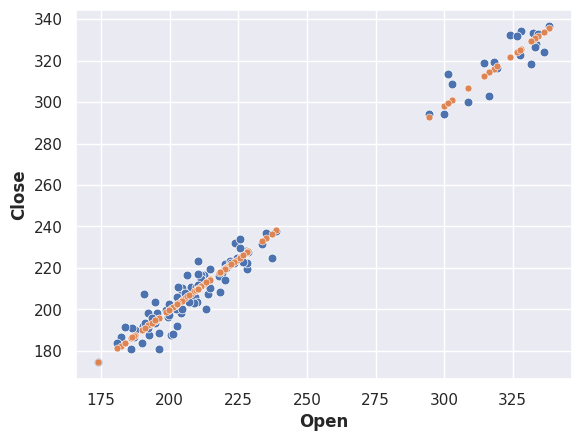

In [78]:
sns.scatterplot(serie_1, serie_2,s=40)
sns.scatterplot(serie_1, y_predict,s=25)

In [79]:
con.get_last_price(instrument)

Bid     199.08
Ask     199.33
High    187.53
Low     201.11
Name: 2022-06-02 19:30:45.145000, dtype: float64

In [82]:
lr.score(serie_1.to_frame(), serie_2)

0.9826698203124048

#11.Distribuciones muestrales y técnicas de evluación de modelos

##Bootstrap

In [83]:
candles_bid['Mid'].sample(n=20, replace = False)

date
2022-01-04 22:00:00    337.355
2022-04-07 21:00:00    223.070
2022-02-18 22:00:00    207.675
2022-02-28 22:00:00    209.405
2022-02-16 22:00:00    214.435
2022-05-13 21:00:00    195.400
2022-02-02 22:00:00    325.120
2022-04-18 21:00:00    210.215
2022-03-16 21:00:00    199.090
2022-01-14 22:00:00    329.125
2022-04-28 21:00:00    204.250
2022-03-07 22:00:00    194.035
2022-04-19 21:00:00    213.760
2022-04-20 21:00:00    206.865
2022-04-29 21:00:00    202.400
2022-04-06 21:00:00    224.855
2022-02-14 22:00:00    218.305
2022-03-02 22:00:00    206.235
2022-01-05 22:00:00    330.215
2022-01-19 22:00:00    318.830
Name: Mid, dtype: float64

In [84]:
candles_bid.sample(frac=0.1, replace=True)

,Open,Close,High,Low,Mid
date,,,,,
2022-05-18 21:00:00,202.60,192.18,200.84,191.53,197.390
2022-04-13 21:00:00,211.52,214.85,216.42,211.13,213.185
2022-05-24 21:00:00,196.06,180.92,183.48,175.99,188.490
2022-02-08 22:00:00,220.67,220.03,225.60,216.03,220.350
2022-03-18 21:00:00,206.38,216.44,216.73,206.38,211.410
2022-03-22 21:00:00,211.35,216.60,219.35,210.06,213.975
2022-03-03 22:00:00,208.84,202.88,208.95,201.30,205.860
2022-04-28 21:00:00,202.71,205.79,208.36,192.78,204.250
2022-03-23 21:00:00,213.26,213.36,216.71,212.09,213.310


In [85]:
cansles_mid = candles_bid['Mid']


In [87]:
means = []

In [88]:
for i in range(100_000):
    sample = cansles_mid.sample(n=50, replace=True)
    means.append(sample.mean())
    
serie_means = pd.Series(means)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


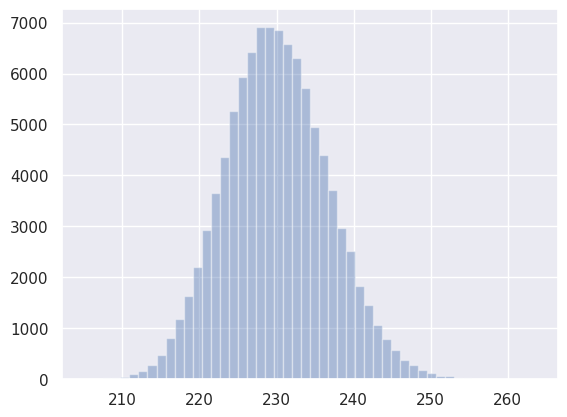

In [89]:
sns.distplot(serie_means, kde=False, norm_hist=False);

In [90]:
serie_means.skew()

0.17499103113546693

In [91]:
serie_means.kurtosis()

-0.02790200820247879

In [92]:
print(f'Error estandar: {serie_means.std()}')

Error estandar: 6.666525247006866


In [93]:
print(f'Valor mínimo: {serie_means.min()}')
print(f'Valor máximo: {serie_means.max()}')
print(f'Rango: {serie_means.max() - serie_means.min()}')

Valor mínimo: 205.06079999999997
Valor máximo: 263.57719999999995
Rango: 58.516399999999976


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


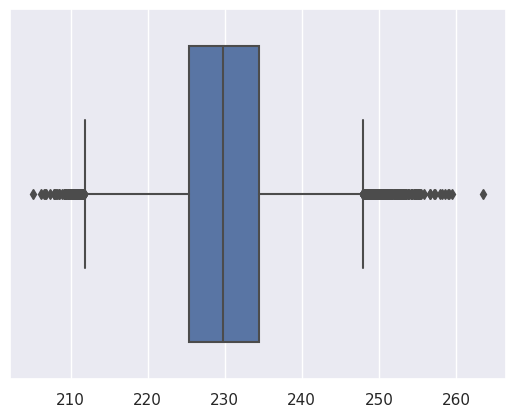

In [94]:
sns.boxplot(serie_means);

In [95]:
limite_inferior = serie_means.quantile(0.025)
limite_superior = serie_means.quantile(0.975)

In [97]:
print(f'Intervalo de 95% confianza de la media: {limite_inferior} < {cansles_mid.mean()} < {limite_superior}')

Intervalo de 95% confianza de la media: 217.4392974999999 < 229.97254999999998 < 243.56380250000007


In [98]:
mean_of_intervals = ((cansles_mid.mean() - limite_inferior) + (limite_superior - cansles_mid.mean())) / 2

In [101]:
print(f'Intervalo de 95% confianza de la media: {cansles_mid.mean()} +/- {mean_of_intervals}')

Intervalo de 95% confianza de la media: 229.97254999999998 +/- 13.062252500000085


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


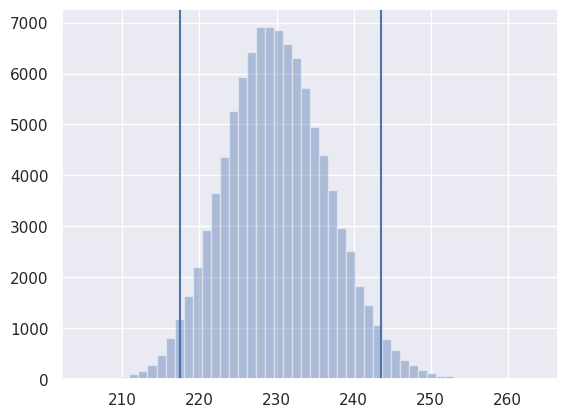

In [102]:
sns.distplot(serie_means, kde=False, norm_hist=False)
plt.axvline(limite_inferior)
plt.axvline(limite_superior);

#Real-Time SMA Crossover Strategy

https://docs.python.org/es/3/library/datetime.html
https://www.programiz.com/python-programming/datetime/current-datetime 
https://pandas.pydata.org/docs/reference/api
https://github.com/matplotlib/mplfinance/blob/master/examples/panels.ipynb
https://github.com/fxcm/RestAPI/blob/master/Europe-Algo-Meetup/EMA%20Crossover%20Strategy%20and%20Backtesting.ipynb
https://github.com/fxcm/RestAPI/blob/master/Europe-Algo-Meetup/Real-Time%20SMA%20Crossover%20Strategy.ipynb/
